# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [3]:
data = pd.read_csv('Categorical.csv')
data.head(5)

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


Remove the duplicate index column from the dataset. 

In [20]:
data['continent'].value_counts()

Africa                     54
Asia                       53
Europe                     50
North America              38
Oceania                    24
South America              13
Seven seas (open ocean)     8
Antarctica                  1
Name: continent, dtype: int64

## Map the data

Use the <i>'continent'</i> category for this analysis.

In [22]:
data_mapped = data.copy()
data_mapped['continent'] = data_mapped['continent'].map({'Africa':0, 'Asia':1, 'Europe':2, 'North America':3, 'Oceania':4,
                                                        'South America':5, 'Seven seas (open ocean)':6, 'Antarctica':7})
data_mapped.head(5)

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,3
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,3
4,Albania,20.049834,41.142450,2


## Select the features

In [25]:
x = data_mapped.iloc[:,3:4]
x

,continent
0,3
1,1
2,0
3,3
4,2
...,...
236,4
237,1
238,0
239,0


## Clustering

Use 4 clusters initially.

In [27]:
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(n_clusters=4)

## Clustering results

In [31]:
id_cluster = kmeans.fit_predict(x)

In [32]:
data_with_cluster = data.copy()
data_with_cluster['Cluster'] = id_cluster
data_with_cluster

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,North America,3
1,Afghanistan,66.004734,33.835231,Asia,0
2,Angola,17.537368,-12.293361,Africa,2
3,Anguilla,-63.064989,18.223959,North America,3
4,Albania,20.049834,41.142450,Europe,0
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania,3
237,Yemen,47.586762,15.909280,Asia,0
238,South Africa,25.083901,-29.000341,Africa,2
239,Zambia,27.774759,-13.458242,Africa,2


## Plot the data

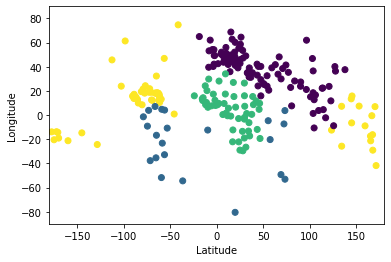

In [37]:
plt.scatter(data['Longitude'],data['Latitude'], c=data_with_cluster['Cluster'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.